In [11]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv('data/grid.csv', index_col=False)

In [13]:
df.shape

(7550816, 5)

In [14]:
df.head()

,lat,long,population,wind_speed,solar
0,83.166667,-74.208333,0.000009,4.253750,107.335396
1,83.166667,-74.166667,0.000011,4.253750,107.335396
2,83.166667,-74.125000,0.000011,4.253750,107.335396
3,83.166667,-74.083333,0.000011,4.253750,107.335396
4,83.166667,-74.041667,0.000008,4.266758,107.335396


In [15]:
df.describe()

,lat,long,population,wind_speed,solar
count,7.550816e+06,7.550816e+06,7.550816e+06,7.550816e+06,5.466938e+06
mean,2.786862e+01,3.325548e+01,1.055441e+03,5.352146e+00,1.981195e+02
std,3.160811e+01,7.909977e+01,7.488572e+03,1.451870e+00,5.507194e+01
min,-5.595833e+01,-1.800000e+02,1.000764e-06,1.514835e+00,9.323751e+01
25%,3.708333e+00,-1.183333e+01,2.572716e+00,4.495554e+00,1.272651e+02
50%,3.325000e+01,3.879167e+01,3.409866e+01,5.424164e+00,2.192026e+02
75%,5.387500e+01,9.983333e+01,3.465207e+02,6.447748e+00,2.373355e+02
max,8.316667e+01,1.799583e+02,1.710353e+06,1.266485e+01,2.774151e+02


In [16]:
df = df.dropna()
len(df)

5466938

In [17]:
df.columns

Index(['lat', 'long', 'population', 'wind_speed', 'solar'], dtype='object')

# CLUSTERING!!!

#  KMEANS

In [57]:
from sklearn import preprocessing, cluster, compose

import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy

import plotly.express as px
import plotly.graph_objs as go

In [19]:
SEED = 7

In [20]:
scaled_features = df.copy()

colsToScale = ['population', 'wind_speed', 'solar']

# Scale data accordingly prior to clustering
features = scaled_features[colsToScale]
scale = preprocessing.StandardScaler().fit(scaled_features[colsToScale].values)
features = scale.transform(features.values)
features

array([[-0.14126914, -0.63486036, -1.64846449],
       [-0.14126914, -0.63486036, -1.64846449],
       [-0.14126914, -0.63486036, -1.64846449],
       ...,
       [-0.14042724,  0.48643027,  1.08912238],
       [-0.14045883,  0.48643027,  1.08912238],
       [-0.14051011,  0.48643027,  1.08912238]])

In [21]:
df[colsToScale] = features
df.describe()

,lat,long,population,wind_speed,solar
count,5.466938e+06,5.466938e+06,5.466938e+06,5.466938e+06,5.466938e+06
mean,3.005070e+01,2.822675e+01,6.041046e-17,3.169293e-15,-6.305147e-17
std,2.850336e+01,7.818182e+01,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.995833e+01,-1.700000e+02,-1.412691e-01,-2.538172e+00,-1.904455e+00
25%,7.625000e+00,-9.708333e+00,-1.408678e-01,-5.490164e-01,-1.286579e+00
50%,3.579167e+01,3.800000e+01,-1.368733e-01,1.834166e-02,3.828279e-01
75%,5.295833e+01,9.300000e+01,-9.571783e-02,7.983682e-01,7.120859e-01
max,8.316667e+01,1.499583e+02,2.494570e+02,3.311951e+00,1.439854e+00


In [1]:
px.scatter_matrix(df[['population', 'wind_speed', 'solar']].sample(100), title="test")

NameError: name 'px' is not defined

In [24]:
data = df[["population", "wind_speed", "solar"]]
max_k = 10
## iterations
distortions = []
for i in range(1, max_k+1):
    if len(data) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=SEED)
       model.fit(data)
       distortions.append(model.inertia_)

## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))



In [25]:
distortions

[16400813.999999646,
 11668803.454086225,
 8413815.223801076,
 5895024.738169259,
 4816022.866965795,
 4046151.033342102,
 3292829.727852149,
 2641230.397043013,
 2314470.8446692275,
 1988242.7272926013]

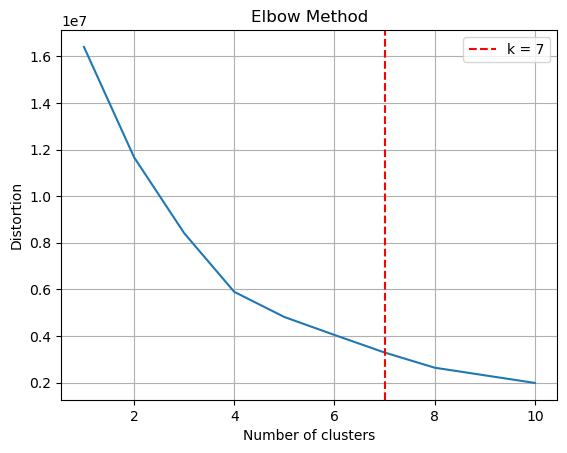

In [26]:
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)


In [30]:
k = 7

# Apply optimal k and assign cluster number to each data point
model = cluster.KMeans(n_clusters=k)
data = df[['population', 'wind_speed', 'solar']]

df_kmeans = data.copy()
df_kmeans['cluster'] = model.fit_predict(data[['population', 'wind_speed', 'solar']])


df[["kmeans_label"]] = df_kmeans[["cluster"]]
df['kmeans_label'].value_counts()

1    1700931
4    1276618
0    1232350
2     670811
5     571965
3      13606
6        657
Name: kmeans_label, dtype: int64

In [31]:
model.cluster_centers_

array([[-1.29594866e-01, -3.60533387e-01, -1.29806187e+00],
       [-1.02090247e-01,  8.96392921e-01,  7.83277716e-01],
       [-4.89262907e-02, -1.86717679e+00,  4.62558657e-01],
       [ 9.89258360e+00, -2.62154957e-01,  4.57158563e-01],
       [ 1.96735903e-01, -3.31074916e-01,  5.69606517e-01],
       [-1.02180436e-01,  1.04640271e+00, -1.35795428e+00],
       [ 5.93466967e+01, -2.56536616e-01,  5.83553723e-01]])

In [59]:
# Un-scaled centroids: population, wind_speed, solar
kmeans_centers = scale.inverse_transform(model.cluster_centers_)
for i, center in enumerate(kmeans_centers):
    
    print(f"Centroid {i}:  Population: {center[0]:.3f}  Wind Speed: {center[1]:.3f}   Solar: {center[2]:.3f}")

Centroid 0:  Population: 79.997  Wind Speed: 4.649   Solar: 126.633
Centroid 1:  Population: 268.470  Wind Speed: 6.457   Solar: 241.256
Centroid 2:  Population: 632.772  Wind Speed: 2.480   Solar: 223.594
Centroid 3:  Population: 68756.212  Wind Speed: 4.790   Solar: 223.296
Centroid 4:  Population: 2316.154  Wind Speed: 4.691   Solar: 229.489
Centroid 5:  Population: 267.852  Wind Speed: 6.673   Solar: 123.334
Centroid 6:  Population: 407636.756  Wind Speed: 4.798   Solar: 230.257


In [33]:
clusterToCount = dict(df_kmeans['cluster'].value_counts())
smallestClassSize = min(clusterToCount.values())
clusterToCount

{1: 1700931, 4: 1276618, 0: 1232350, 2: 670811, 5: 571965, 3: 13606, 6: 657}

In [34]:
countDf = pd.DataFrame(clusterToCount, index=[0]).transpose().rename(columns={0: 'count'}).reset_index().sort_values('count')
countDf.rename(columns={'index': 'cluster'}, inplace=True)
px.bar(countDf, x='cluster', y='count')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'cluster=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([6, 3, 5, 2, 0, 4, 1]),
              'xaxis': 'x',
              'y': array([    657,   13606,  571965,  670811, 1232350, 1276618, 1700931]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'cluster'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'count'}}}
})

In [36]:
df['weight'] = df.apply(lambda row: clusterToCount[row['kmeans_label']], axis=1)

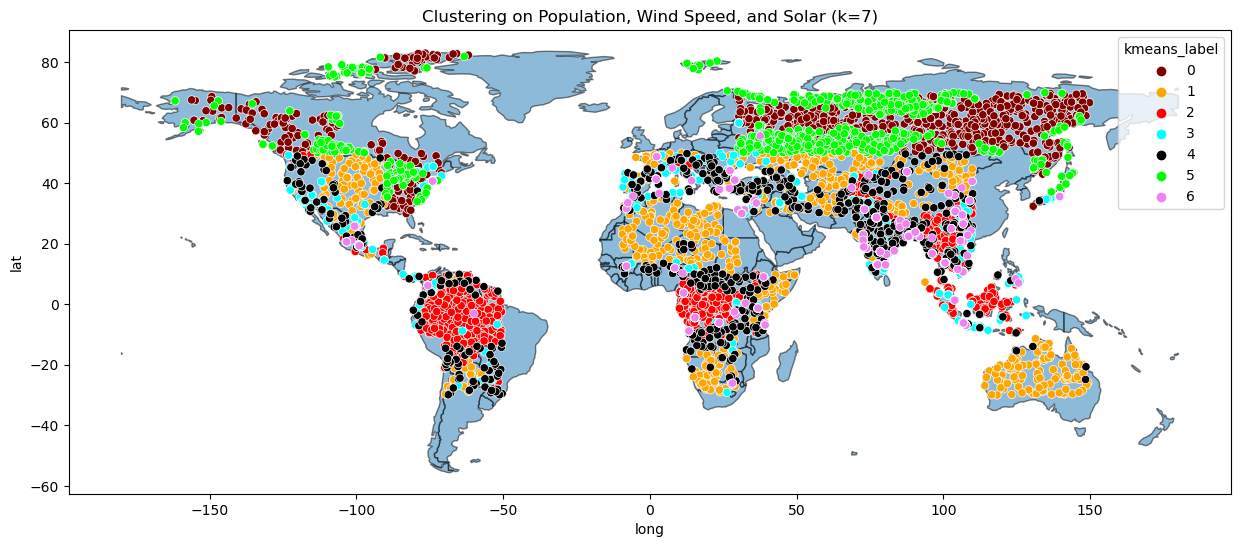

In [128]:
map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
map = map[map.name != 'Antarctica']

ax = map.plot(alpha=0.5, edgecolor='black', figsize=(15, 10))


# Ensure that the displayed sample is representative
sample = df.groupby(by='kmeans_label').apply(lambda group: group.sample(smallestClassSize))
kmeans_colors = ['maroon', 'orange', 'red', 'cyan', 'black', 'lime', 'violet']

sns.scatterplot(x="long", y="lat", data=sample, 
                palette=kmeans_colors,
                hue='kmeans_label', size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering on Population, Wind Speed, and Solar (k='+str(k)+')')
plt.show()

In [140]:
# Centroid analysis
df_kmeans_centers= pd.DataFrame(kmeans_centers).reset_index()
df_kmeans_centers.columns = ['cluster', 'population', 'wind speed', 'solar']
df_kmeans_centers['color'] = kmeans_colors

df_kmeans_table = df_kmeans_centers[['cluster', 'color']].copy()
df_kmeans_table['pop_rank'] = [i + 1 for i in df_kmeans_centers['population'].sort_values(ascending=False).reset_index().sort_values(by='index').index]
df_kmeans_table['wind_rank'] = [i + 1 for i in df_kmeans_centers['wind speed'].sort_values(ascending=False).reset_index().sort_values(by='index').index]
df_kmeans_table['solar_rank'] = [i + 1 for i in df_kmeans_centers['solar'].sort_values(ascending=False).reset_index().sort_values(by='index').index]


fig = go.Figure(data=[go.Table(
    header=dict(values=df_kmeans_table.columns,
                align='left'),
    cells=dict(values=[df_kmeans_table[column] for column in df_kmeans_table.columns],
               align='left'))
])
fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'cells': {'align': 'left',
                        'values': [[0, 1, 2, 3, 4, 5, 6], ['maroon', 'orange',
                                   'red', 'cyan', 'black', 'lime', 'violet'], [7,
                                   5, 4, 2, 3, 6, 1], [6, 2, 7, 4, 5, 1, 3], [6, 1,
                                   4, 5, 3, 7, 2]]},
              'header': {'align': 'left',
                         'values': array(['cluster', 'color', 'pop_rank', 'wind_rank', 'solar_rank'], dtype=object)},
              'type': 'table'}],
    'layout': {'template': '...'}
})

# BIRCH

In [55]:
birch_model = cluster.Birch(n_clusters=None, threshold=1.5)

In [56]:
birch_model.fit(df[['population', 'wind_speed', 'solar']].values)

Birch(n_clusters=None, threshold=1.5)

In [141]:
df['birch_label'] = birch_model.labels_

In [172]:
# Only keep clusters with large enough size
birch_label_by_count = df.groupby(by='birch_label').agg(count=('birch_label', 'count')).reset_index()
birch_label_by_count = birch_label_by_count[birch_label_by_count['count'] >= 5000]
validLabels = sorted(list(birch_label_by_count['birch_label']))
len(validLabels)

6

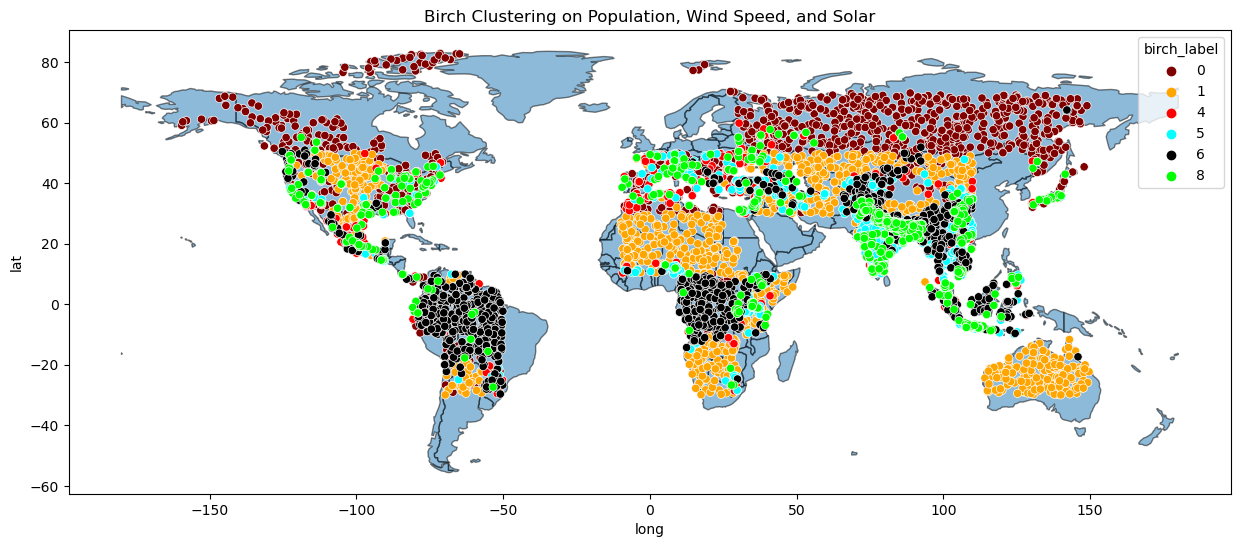

In [173]:
map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
map = map[map.name != 'Antarctica']

ax = map.plot(alpha=0.5, edgecolor='black', figsize=(15, 10))

# Ensure that the displayed sample is representative of each cluster
sample = df.groupby(by='birch_label').apply(lambda group: group.sample(0) if group.name not in validLabels else group.sample(1000))

birch_colors = ['maroon', 'orange', 'red', 'cyan', 'black', 'lime']

sns.scatterplot(x="long", y="lat", data=sample, 
                palette=birch_colors,
                hue='birch_label', size_order=[1,0],
                legend="brief", ax=ax).set_title('Birch Clustering on Population, Wind Speed, and Solar')
plt.show()

In [174]:
birch_centers = scale.inverse_transform(birch_model.subcluster_centers_)
birch_centers = birch_centers[validLabels, ]
for i, center in zip(validLabels, birch_centers):
    print(f"Center {i}:  Population: {center[0]:.3f}  Wind Speed: {center[1]:.3f}   Solar: {center[2]:.3f}")


Center 0:  Population: 812.771  Wind Speed: 5.444   Solar: 173.395
Center 1:  Population: 359.068  Wind Speed: 6.157   Solar: 258.947
Center 4:  Population: 47153.241  Wind Speed: 4.371   Solar: 238.079
Center 5:  Population: 9337.015  Wind Speed: 4.890   Solar: 240.478
Center 6:  Population: 702.599  Wind Speed: 2.994   Solar: 227.390
Center 8:  Population: 26173.012  Wind Speed: 4.393   Solar: 238.298


In [177]:
# Centroid analysis
df_birch_centers= pd.DataFrame(birch_centers).reset_index()
df_birch_centers.columns = ['cluster', 'population', 'wind speed', 'solar']
df_birch_centers['color'] = birch_colors

df_birch_table = df_birch_centers[['cluster', 'color']].copy()
df_birch_table['pop_rank'] = [i + 1 for i in df_birch_centers['population'].sort_values(ascending=False).reset_index().sort_values(by='index').index]
df_birch_table['wind_rank'] = [i + 1 for i in df_birch_centers['wind speed'].sort_values(ascending=False).reset_index().sort_values(by='index').index]
df_birch_table['solar_rank'] = [i + 1 for i in df_birch_centers['solar'].sort_values(ascending=False).reset_index().sort_values(by='index').index]

df_birch_centers
fig = go.Figure(data=[go.Table(
    header=dict(values=df_birch_table.columns,
                align='left'),
    cells=dict(values=[df_birch_table[column] for column in df_birch_table.columns],
               align='left'))
])
fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'cells': {'align': 'left',
                        'values': [[0, 1, 2, 3, 4, 5], ['maroon', 'orange', 'red',
                                   'cyan', 'black', 'lime'], [4, 6, 1, 3, 5, 2],
                                   [2, 1, 5, 3, 6, 4], [6, 1, 4, 2, 5, 3]]},
              'header': {'align': 'left',
                         'values': array(['cluster', 'color', 'pop_rank', 'wind_rank', 'solar_rank'], dtype=object)},
              'type': 'table'}],
    'layout': {'template': '...'}
})